# movement_decompose_2d running example
Welcome! This file is an example on how to work with this library, and decompose a single 2d movement into probable submovements that compose it. \
The first step is always to import the relevant module:

In [1]:
import movement_decompose_2d

### load data

In [2]:
example_data = r'../data/subject08day1pre'
position_filtered, velocity, time = movement_decompose_2d.load_data(example_data)

### Display movements

#### Movement Position

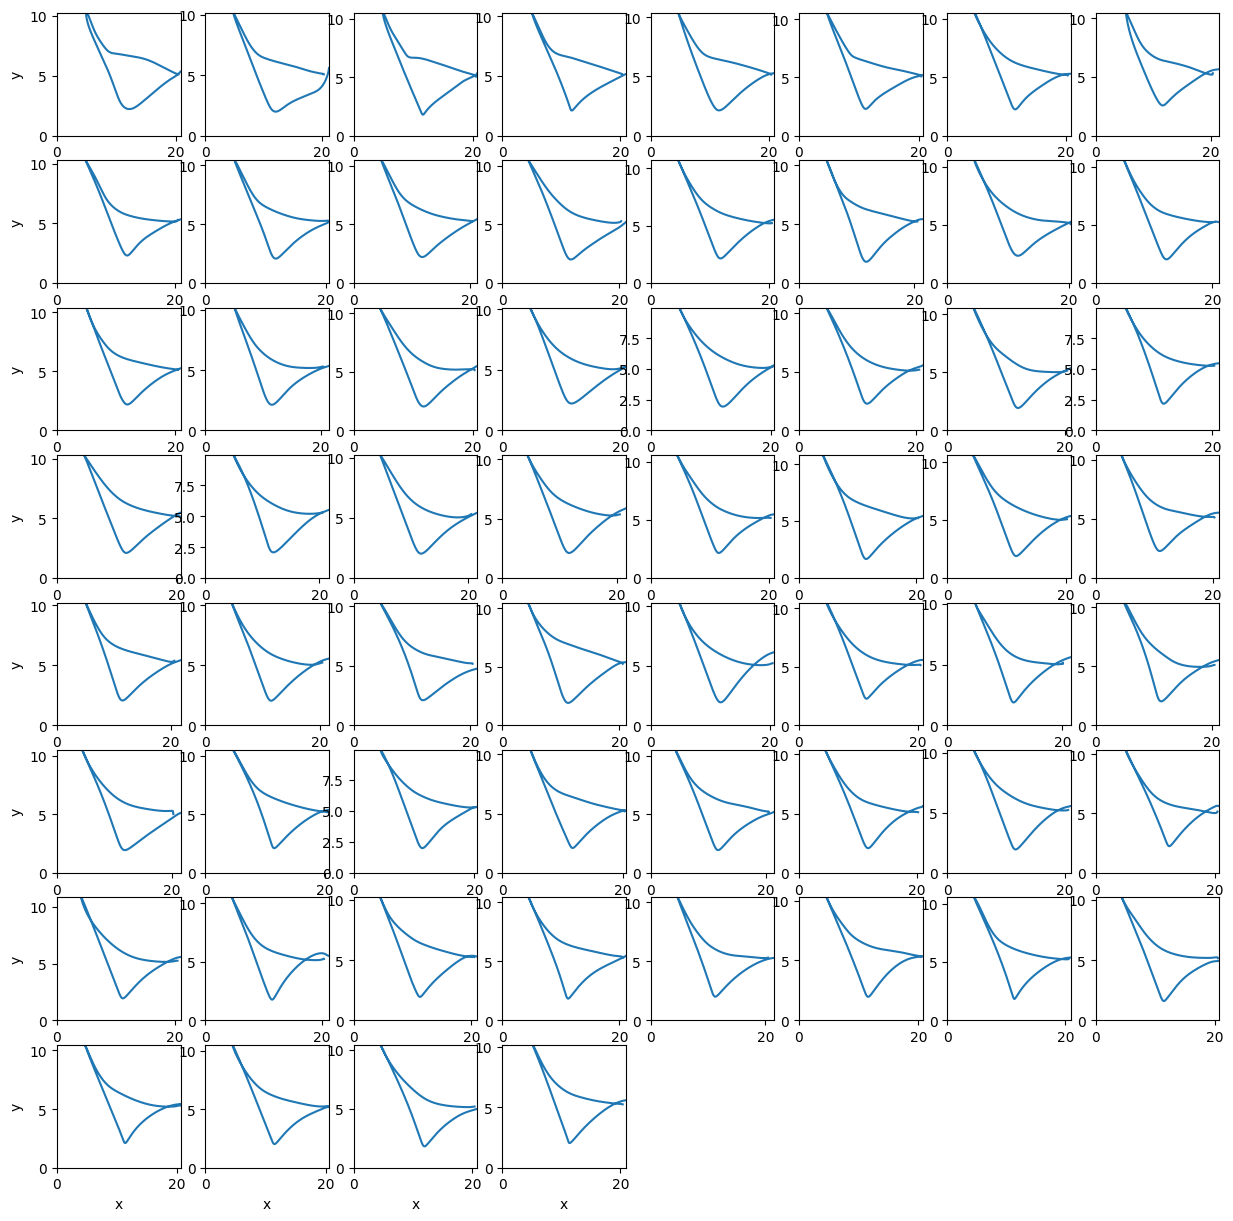

In [3]:
movement_decompose_2d.plot_position(position_filtered, time,plot_type=1) #  x vs y position

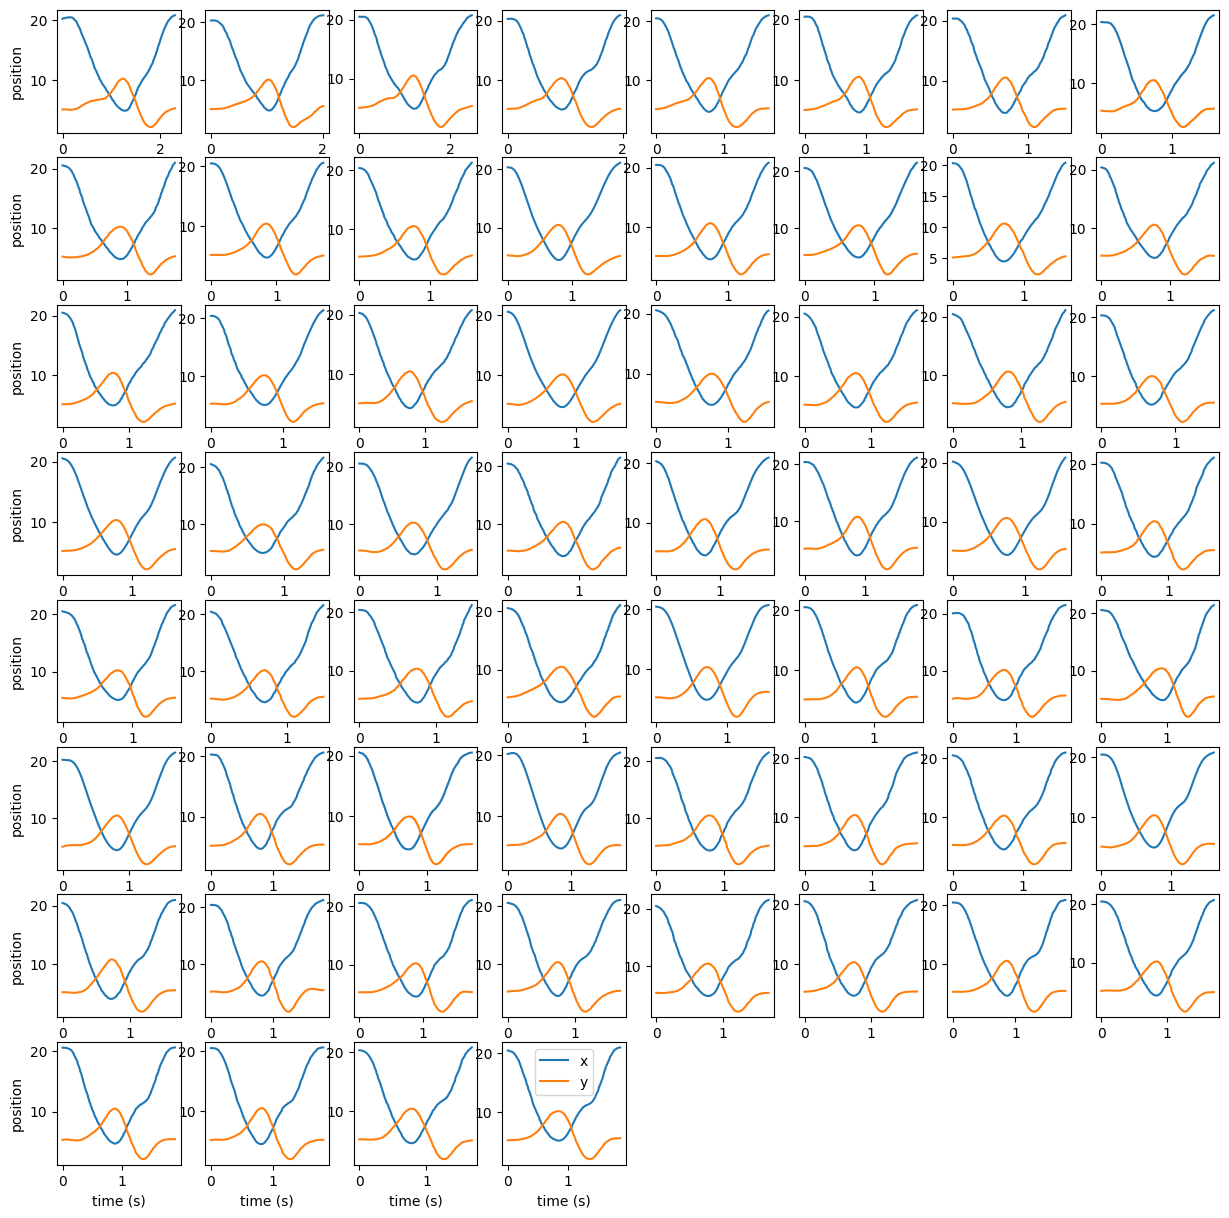

In [4]:
movement_decompose_2d.plot_position(position_filtered, time,plot_type=2) # Time vs. x & y position.

#### Movement Velocity

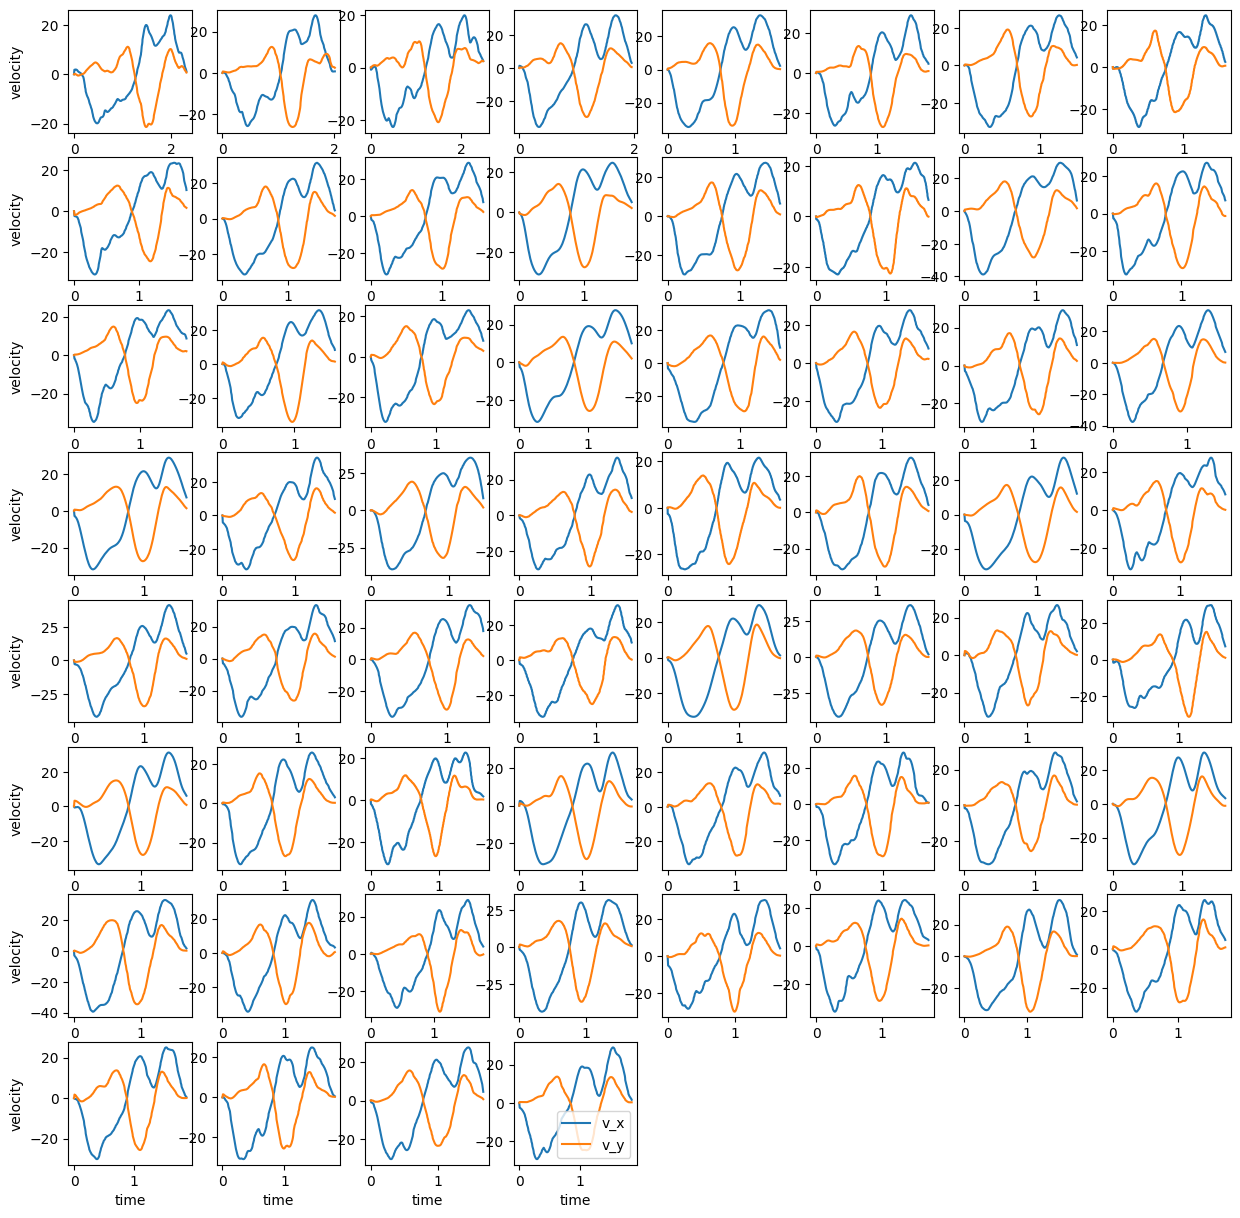

In [5]:
movement_decompose_2d.plot_velocity(velocity, time,plot_type=1) # Time vs. v_x & v_y velocity.

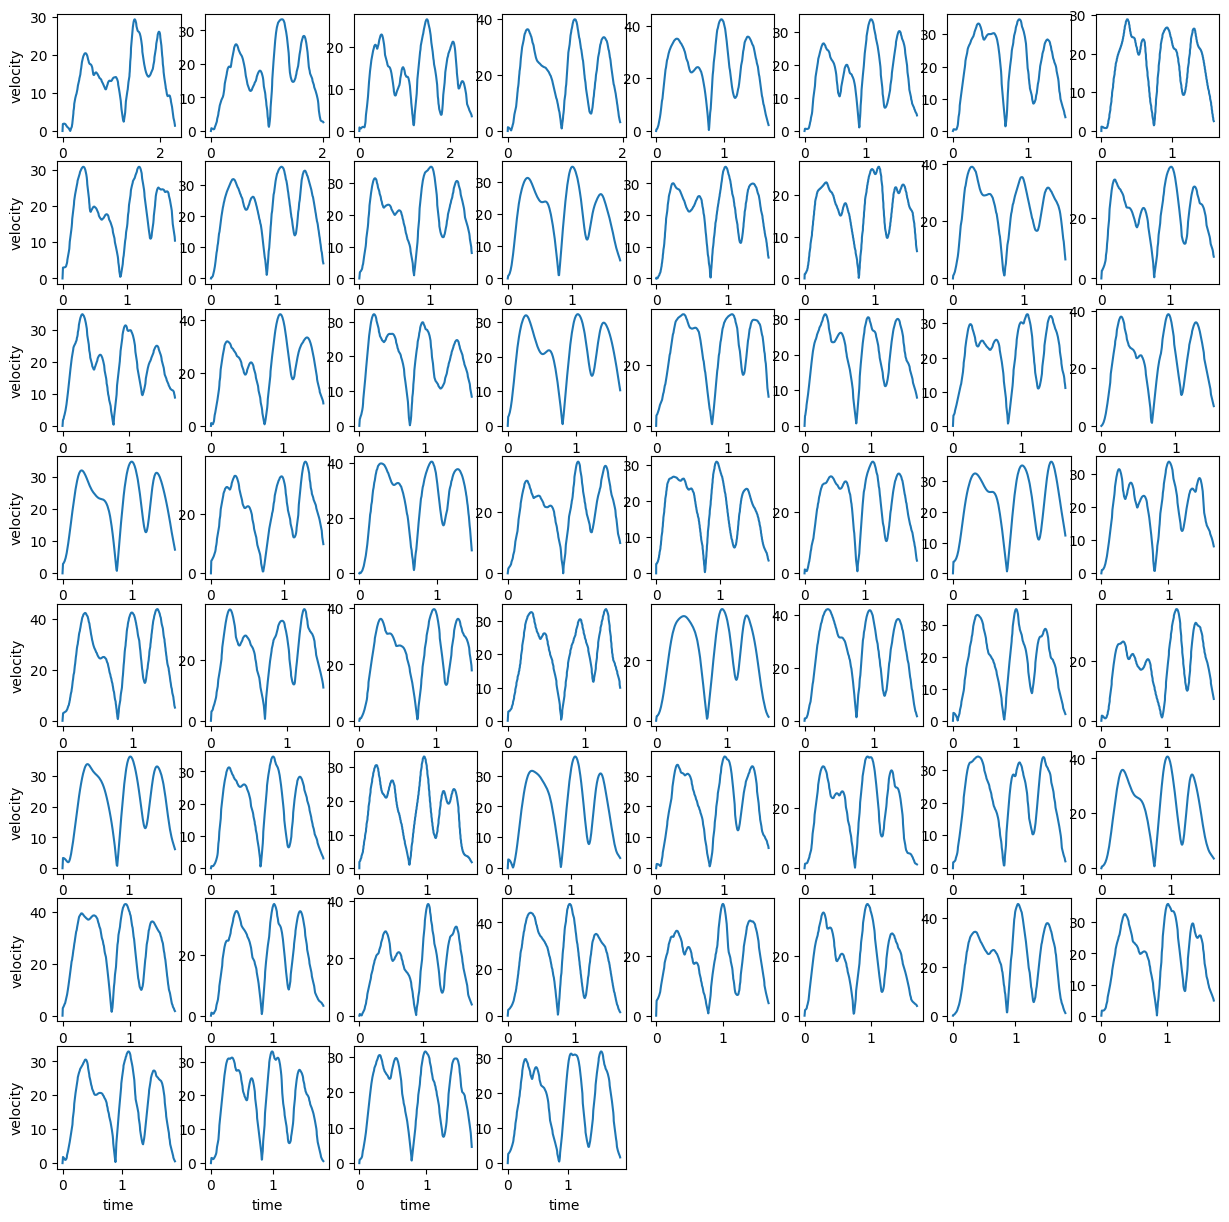

In [6]:
movement_decompose_2d.plot_velocity(velocity, time,plot_type=2) # Time vs. tangential velocity.

### Decompose to 4 submovments

In [7]:
# define parameters: , what is the & y
n_submovements = 4 # how many submovments
x_range = (-20, 20) #  minimal & maximal values of x
y_range = (-10, 10) #  minimal & maximal values of y
mov_ind = 0 # movement to decompose, by ind

# decompose the movement. Note that we use the velocity, not the position
best_error, final_parms = movement_decompose_2d.decompose_2D(time[mov_ind], velocity[mov_ind],
                                      n_sub_movement=n_submovements,
                                      x_rng=x_range, y_rng=y_range)
print(best_error) # print the error of the found movement
print(final_parms) # print the parameters of the submovement.

/usr/local/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


0.03385937453817942
[[ 0.16791602  0.72850207 -8.16371746  1.56107747]
 [ 0.63977954  0.72136855 -4.54996335  3.27635802]
 [ 1.203558    0.6617277   6.13136319 -7.52864973]
 [ 1.64810529  0.65036928  6.64018233  3.75550402]]


In final_parms, each row is a different submovment, and each col is a different parameter.\
The parameters are (by column order):\
 [start_t, movment_duration, displacement_x, displacement_y].

### Plot submovements & actual velocities

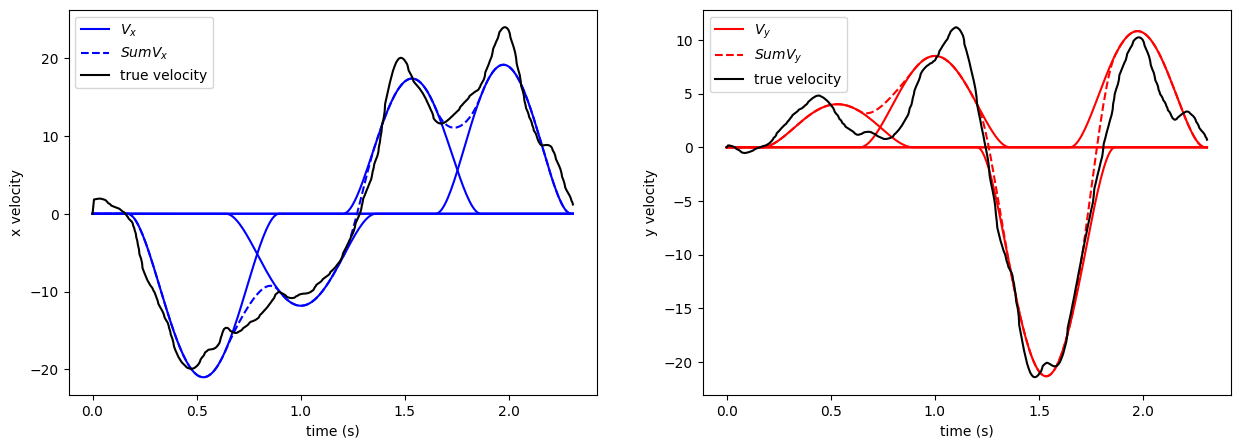

,t0,D,Ax,Ay
0,0.167916,0.728502,-8.163717,1.561077
1,0.639780,0.721369,-4.549963,3.276358
2,1.203558,0.661728,6.131363,-7.528650
3,1.648105,0.650369,6.640182,3.755504


In [8]:
import matplotlib.pyplot as plt # just for adding the actual movement
import numpy as np
axs,_,vx_lines,vy_lines,vx_sum_line,vy_sum_line = movement_decompose_2d.plot_submovements_2D(final_parms,t=time[mov_ind])
vel_x = velocity[mov_ind][:,0]
vel_y = velocity[mov_ind][:,1]
line_true_v_x = axs[0].plot(time[mov_ind],vel_x,'k', label='true velocity')
line_true_v_y = axs[1].plot(time[mov_ind],vel_y,'k', label='true velocity')
axs[0].legend(handles=[vx_lines[0], vx_sum_line[0], line_true_v_x[0]])
axs[1].legend(handles=[vy_lines[0], vy_sum_line[0], line_true_v_y[0]])
plt.show()

# Show the submovement parameters extracted
import pandas as pd
data = pd.DataFrame(final_parms)
data.columns = ['t0','D','Ax','Ay'] 
data

In [ ]:
pipreqsnb